In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Twitter\twitter_training.csv")
val_data = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Twitter\twitter_validation.csv")

In [3]:
train_data.head(3)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [4]:
col = ['tweet_id', 'Entity', 'sentiment', 'description']
train_data.columns = col
val_data.columns = col

In [5]:
train_data.head(3)

,tweet_id,Entity,sentiment,description
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


## Data Cleaning

In [6]:
train_data.shape

(74681, 4)

In [7]:
train_data.isnull().sum()

tweet_id         0
Entity           0
sentiment        0
description    686
dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.drop_duplicates(inplace=True)

In [10]:
train_data.shape

(71655, 4)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     71655 non-null  int64 
 1   Entity       71655 non-null  object
 2   sentiment    71655 non-null  object
 3   description  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


## EDA (Exploratory Data Analysis)

In [12]:
data1 = pd.DataFrame(train_data['sentiment'].value_counts().reset_index())
data1

,sentiment,count
0,Negative,21698
1,Positive,19712
2,Neutral,17708
3,Irrelevant,12537


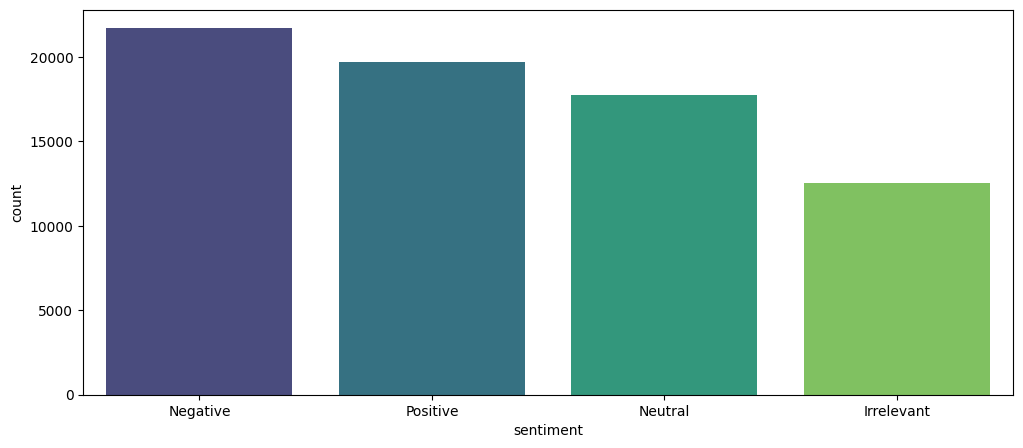

In [13]:
plt.figure(figsize=(12,5))
sns.barplot(data=data1, x='sentiment', y='count', palette='viridis')
plt.show()

In [14]:
train_data.head(2)

,tweet_id,Entity,sentiment,description
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [15]:
train_data['description'] = train_data['description'].str.lower()

In [16]:
train_data.head(2)

,tweet_id,Entity,sentiment,description
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [17]:
train_data['description'].sample()

43393    i don't even know how to play the pub, fuck it.
Name: description, dtype: object

In [18]:
import re

In [19]:
train_data['description'] = train_data['description'].apply(lambda x : re.sub('[^a-zA-Z0-9]+', ' ', x))

In [20]:
train_data.sample(2)

,tweet_id,Entity,sentiment,description
36186,8211,Microsoft,Negative,microsoft is stupid office programs arguably a...
48483,5923,HomeDepot,Negative,donald dear you people have just seriously scr...


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     71655 non-null  int64 
 1   Entity       71655 non-null  object
 2   sentiment    71655 non-null  object
 3   description  71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [33]:
text = train_data['description'].sample(n=1).iloc[0]
print(text)

 2ksupport nba2k are you kidding me but unless a whole le team quits you get a forfeit win how shall you kick a team for not quitting and getting the win so if your losing just suck this game and it won t count 


In [23]:
import nltk

In [24]:
from nltk.corpus import stopwords

In [25]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [34]:
def remove_stopwords(text):
    new_words = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_words.append('')
        else:
            new_words.append(word)
    return " ".join(new_words)

In [35]:
remove_stopwords(text)

'2ksupport nba2k   kidding   unless  whole le team quits  get  forfeit win  shall  kick  team   quitting  getting  win    losing  suck  game     count'

In [36]:
train_data['description'].apply(remove_stopwords)

0                               coming   borders    kill  
1                        im getting  borderlands    kill  
2                       im coming  borderlands    murder  
3                   im getting  borderlands 2    murder   
4                      im getting  borderlands    murder  
                               ...                        
74676     realized   windows partition   mac  like 6 ye...
74677     realized   mac window partition  6 years behi...
74678     realized  windows partition   mac   6 years b...
74679     realized   windows partition   mac  like  6 y...
74680     like  windows partition   mac  like 6 years b...
Name: description, Length: 71655, dtype: object